**Description**: Analyze accuracies for $m = 100, n = 100$.

**Estimated runtime**: `model.fit` was ran in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 100
num_test: Literal[50, 100, 200, 500] = 100

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_from_paper")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

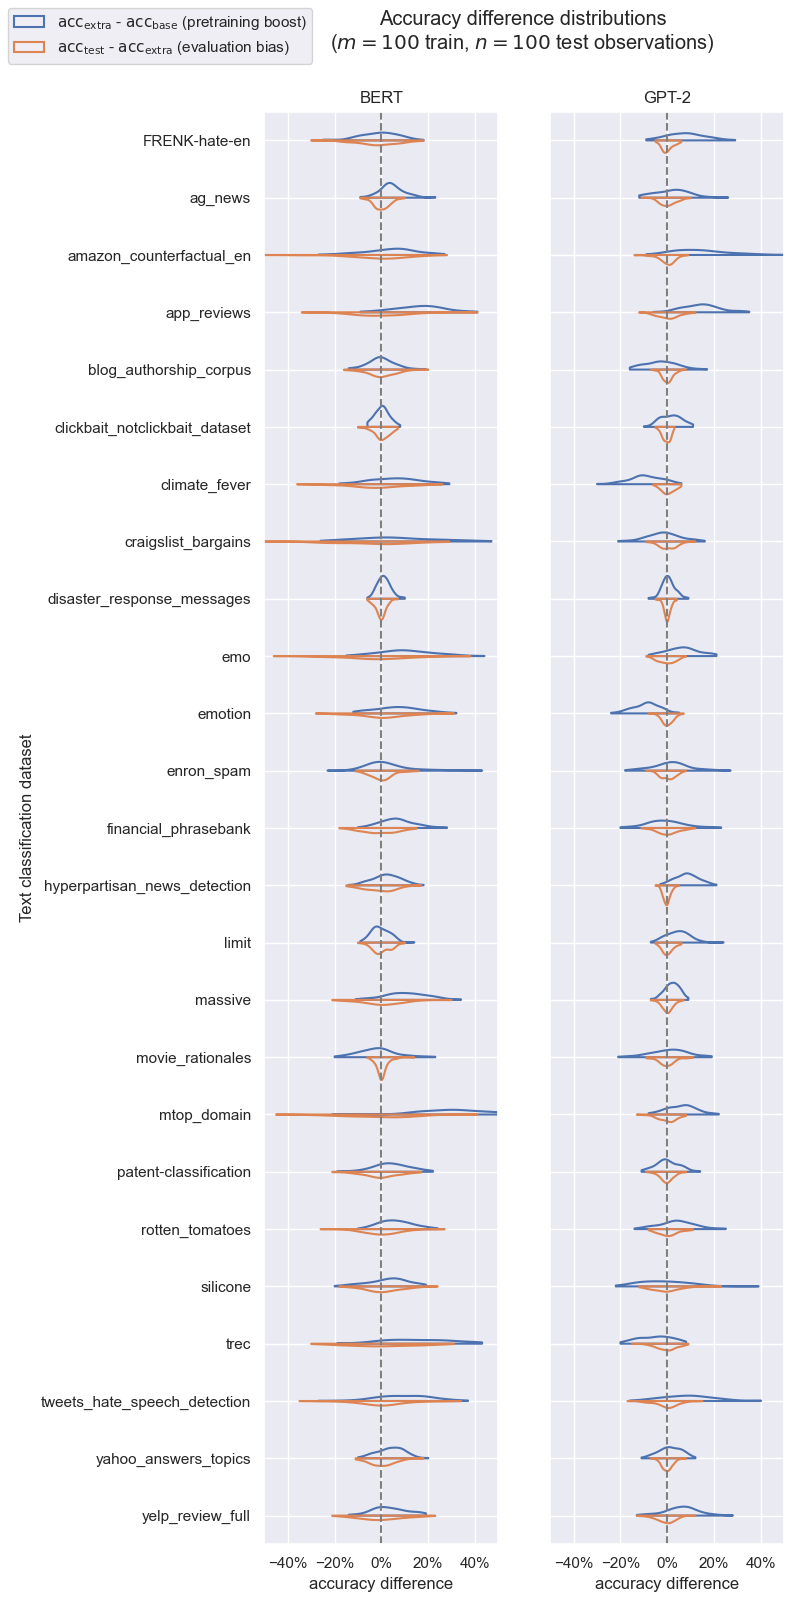

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.042814 ┆ 0.009821 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.229721 ┆ 0.063194 │
└──────────┴──────────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",0.03435,0.009248
"""ag_news""",0.03325,0.006691
"""amazon_counter…",0.08785,0.012473
"""app_reviews""",0.1527,0.009205
"""blog_authorshi…",-0.0147,0.006606
…,…,…
"""silicone""",0.0082,0.009896
"""trec""",0.05305,0.015484
"""tweets_hate_sp…",0.09305,0.011262
"""yahoo_answers_…",0.0264,0.005459


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",0.084144,0.018853
"""ag_news""",0.060654,0.013794
"""amazon_counter…",0.172891,0.032076
"""app_reviews""",1.13372,0.092832
"""blog_authorshi…",-0.019404,0.01294
…,…,…
"""silicone""",0.033955,0.023822
"""trec""",0.263208,0.066851
"""tweets_hate_sp…",0.167018,0.021373
"""yahoo_answers_…",0.367617,0.063806


Ran this in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [10]:
# model_control, summary_control, az_summary_control = utils.stat_model(
#     num_correct_df,
#     treatment="extra",
#     control="base",
#     equation=equation,
#     id_vars=id_vars,
# )

In [11]:
# print(model_control)

# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌───────────┬──────────┐
│ mean      ┆ se       │
╞═══════════╪══════════╡
│ -0.001722 ┆ 0.001057 │
└───────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.024812 ┆ 0.007839 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",-0.0064,0.006433
"""ag_news""",0.00285,0.003452
"""amazon_counter…",-0.0076,0.009614
"""app_reviews""",-0.0013,0.009406
"""blog_authorshi…",0.0021,0.004645
…,…,…
"""silicone""",0.00175,0.006752
"""trec""",0.00065,0.010441
"""tweets_hate_sp…",0.00075,0.008765
"""yahoo_answers_…",0.00125,0.004042


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",-0.005451,0.010971
"""ag_news""",0.00681,0.006035
"""amazon_counter…",-0.003145,0.012704
"""app_reviews""",0.048443,0.03898
"""blog_authorshi…",0.008379,0.009214
…,…,…
"""silicone""",0.008633,0.012831
"""trec""",0.039424,0.029612
"""tweets_hate_sp…",0.009969,0.013929
"""yahoo_answers_…",0.064663,0.03529


Ran this in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [15]:
# model_bias, summary_bias, az_summary_bias = utils.stat_model(
#     num_correct_df,
#     treatment="test",
#     control="extra",
#     equation=equation,
#     id_vars=id_vars,
# )

In [16]:
# print(model_bias)

# Write inference data

Ran this in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [17]:
# netcdfs = os.path.join("..", "..", "netcdfs", f"m{num_train}")
# if not os.path.exists(netcdfs):
#     os.mkdir(netcdfs)

In [18]:
# summary_control.to_netcdf(
#     filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_control.nc")
# )

In [19]:
# summary_bias.to_netcdf(
#     filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_treatment.nc")
# )